# Sobre o Dataframe analisado 

  Os dados fornecidos referem-se aos candidatos a um certo processo seletivo interno de uma empresa, que visava promover uma certa parcela de seus funcionários. Adiante, realizaremos a limpeza dos dados fornecidos e, com base neles, treinaremos um mecanismo que se propõe a prever a promoção ou não de um dado colaborador.

In [14]:
#Importando as bibliotecas necesárias e o dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('train.csv')

Visualizemos as primeiras linhas do dataframe, bem como outras características dele.

In [15]:
df.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1.0,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1.0,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1.0,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2.0,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1.0,45,3.0,2,0,73.0,0


Separemos em princípio as **features** da tabela em categóricas e numéricas, afim de orientarmos nossa limpeza em fases.
Features categóricas: 


*   **department**
*   **region**

*   **education**
*   **gender**

*   **recruitment_channel**











In [16]:
# indexar a lista a partir do ID de funcionário
df.set_index('employee_id', inplace=True)

In [17]:
df.describe(include = object)

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,10,35,3,5,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,35010,30446


A princípio, salta-nos ao olhar as 5 respostas possíveis dentro da feature **gender**, portanto, analisemos quais são e estudemos as medidas cabíveis. 

In [18]:
df.gender.unique()

array(['f', 'm', 'MALE', 'fEMALE', 'eu sou homem hetero homossexual!'],
      dtype=object)

In [19]:
#normalizemos os dados para somente 'f' e 'm'
df['gender'].replace('MALE','m',inplace=True)
df['gender'].replace('fEMALE','f',inplace=True)
df['gender'].replace('eu sou homem hetero homossexual!','m',inplace=True)

In [20]:
df.education.unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [30]:
df.recruitment_channel.unique()

array(['sourcing', 'other', 'referred'], dtype=object)

In [46]:
df.department.unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal',
       'quem trouxe quenga'], dtype=object)

In [47]:
#realizar contagem e retirar 'quem trouxe quenga' se possível
len(df[df['department']=='quem trouxe quenga'])

25

In [48]:
#Pelo número relativamente grande, pode ser interessante substituir pela moda
df['department'].replace('quem trouxe quenga',df['department'].mode()[0],inplace=True)

In [29]:
df.region.unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18',
       'casa da lu na suecia'], dtype=object)

In [31]:
len(df[df['region']=='casa da lu na suecia'])

4

In [32]:
id_suecia = df[df['region']=='casa da lu na suecia'].index
id_suecia

Int64Index([34808, 25476, 39343, 9351], dtype='int64', name='employee_id')

In [33]:
#Retirar os endereçados na 'casa da lu na Suécia'
df.drop(id_suecia,inplace=True)

Após limparmos, seja por exclusão ou reinterpretando um erro de digitação, podemos visualizar graficamente as distribuições por feature. 

<function matplotlib.pyplot.show>

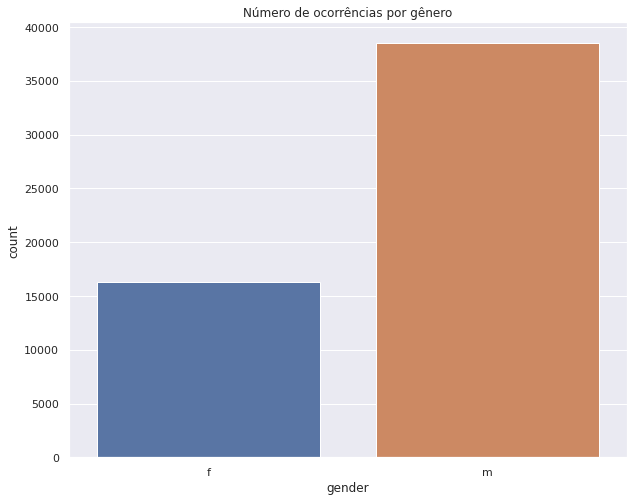

In [37]:
plt.figure(figsize=(10,8))
sns.set_theme(style='darkgrid')
sns.countplot(x=df['gender'])
plt.title('Número de ocorrências por gênero')
plt.show

<function matplotlib.pyplot.show>

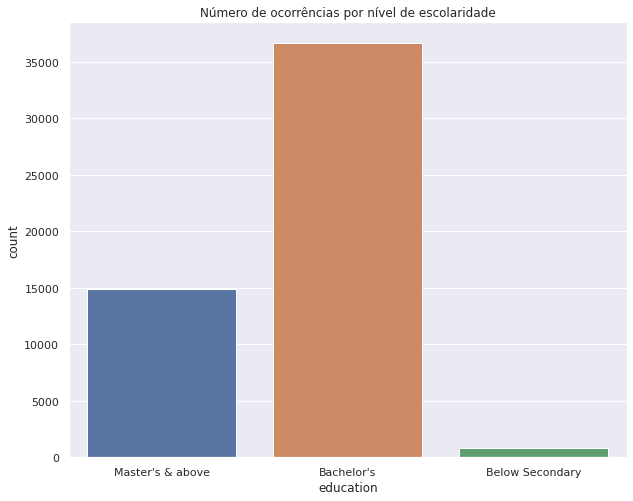

In [38]:
plt.figure(figsize=(10,8))
sns.set_theme(style='darkgrid')
sns.countplot(x=df['education'])
plt.title('Número de ocorrências por nível de escolaridade')
plt.show

<function matplotlib.pyplot.show>

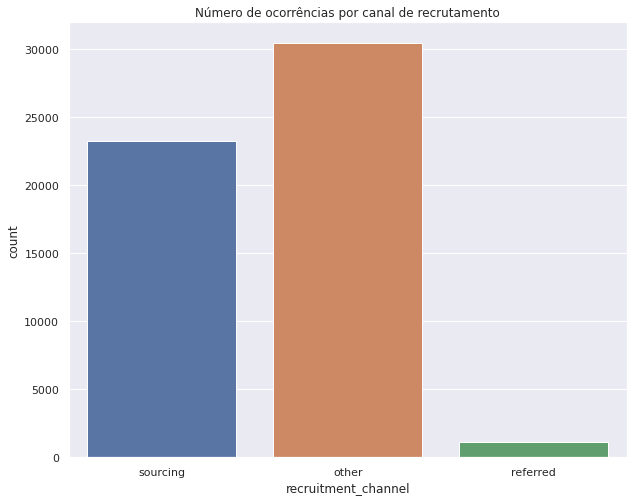

In [39]:
plt.figure(figsize=(10,8))
sns.set_theme(style='darkgrid')
sns.countplot(x=df['recruitment_channel'])
plt.title('Número de ocorrências por canal de recrutamento')
plt.show

<function matplotlib.pyplot.show>

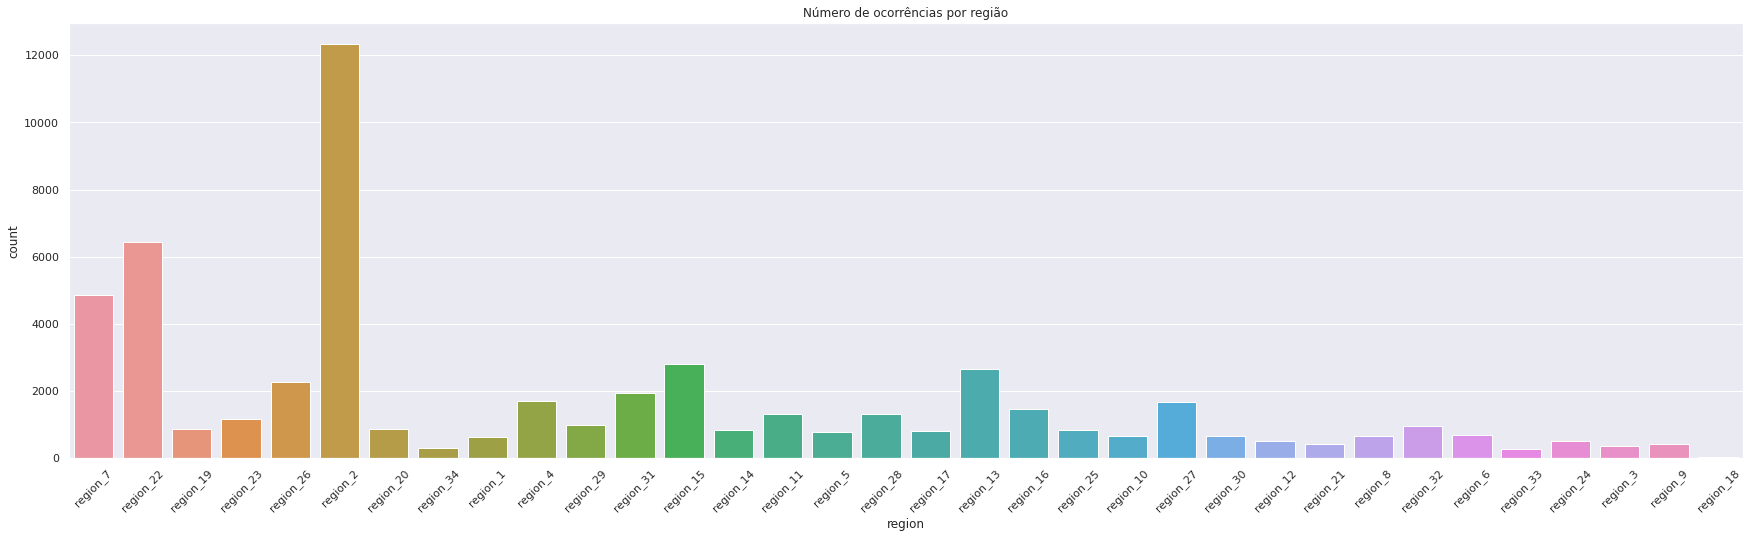

In [43]:
plt.figure(figsize=(30,8))
plt.xticks(rotation=45)
sns.set_theme(style='darkgrid')
sns.countplot(x=df['region'])
plt.title('Número de ocorrências por região')
plt.show

<function matplotlib.pyplot.show>

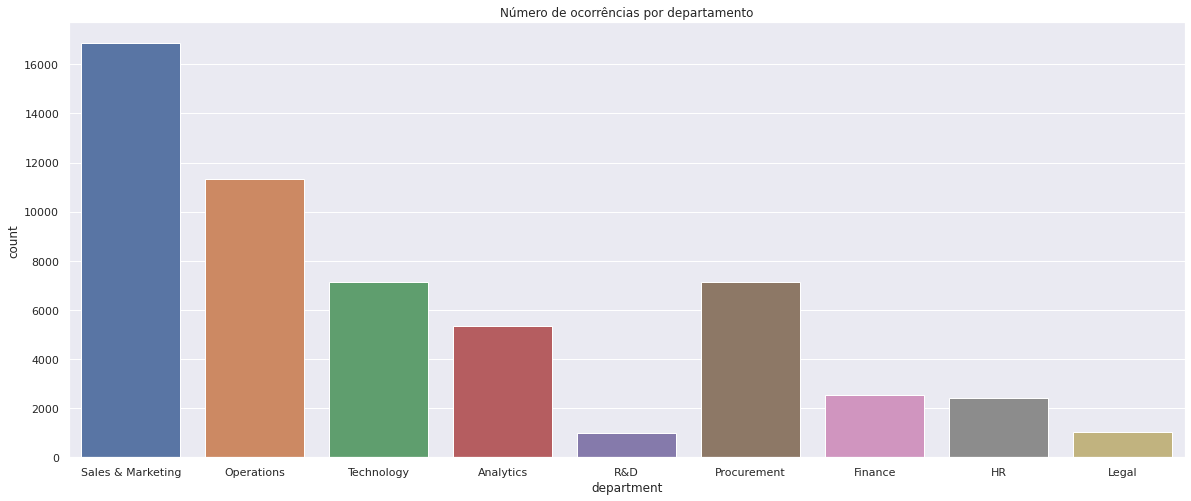

In [49]:
plt.figure(figsize=(20,8))
sns.set_theme(style='darkgrid')
sns.countplot(x=df['department'])
plt.title('Número de ocorrências por departamento')
plt.show

A partir dos gráficos acima, percebemos que de fato limpamos das features categóricas quaisquer dados destoantes. A seguir, realizaremos o procedimento de limpeza para as features numéricas.

In [50]:
df.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,49958.000000,54804.000000,50682.000000,54804.000000,54804.000000,47346.000000,54804.000000
mean,1.256495,273.539504,3.329289,5.865813,0.023155,63.515397,0.085176
std,0.612755,5422.761192,1.259971,4.265099,0.150398,13.491986,0.279146
min,1.000000,-32.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,10.000000,123456.000000,5.000000,37.000000,1.000000,99.000000,1.000000


Idade é uma feature com dados aparentemente destoantes, com seu ponto de mínimo -32 e máximo de 123456.

In [51]:
#Ajustando as idades para números mais razoáveis
df = df[df['age']>0]
df = df[df['age']<=120]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Número de ocorrências por idade')

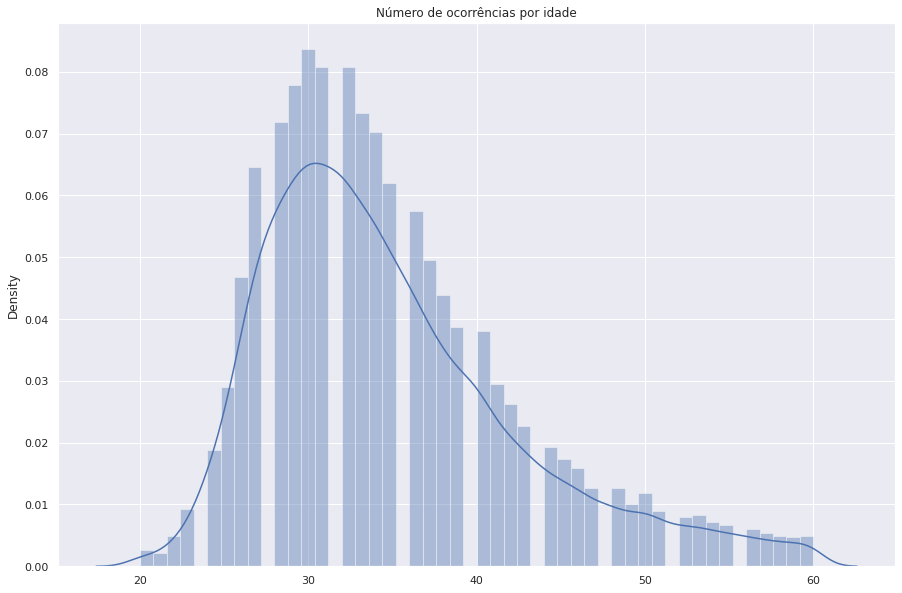

In [52]:
plt.figure(figsize=(15,10))
sns.distplot(x=df['age'].dropna())
plt.title('Número de ocorrências por idade')

# Análise da correlação entre features

Uma vez que temos os dados já revisados, podemos analisar a correlação entre as diversas features do Dataframe, afim de identificar quais as características mais preponderantes dentre os promovidos. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


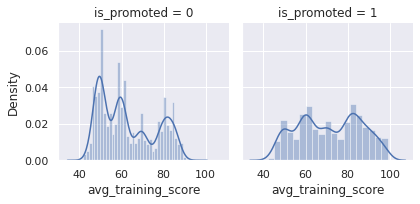

In [62]:
grid = sns.FacetGrid(df, col='is_promoted')
grid.map(sns.distplot,'avg_training_score')
plt.show()

Percebe-se que os funcionários com average training score em torno dos 40 e 50 tendem a não serem promovidos. Pontuações entre 60 e 80 estão mais presentes nos que foram promovidos. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


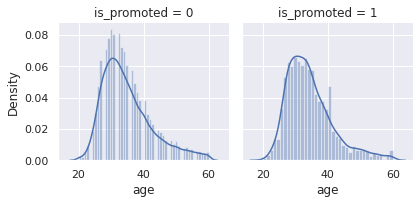

In [63]:
grid = sns.FacetGrid(df, col='is_promoted')
grid.map(sns.distplot,'age')
plt.show()

A curva é relativamente parecida nos dois casos, logo, não há motivo para inferirmos uma correlação entre a idade e a promoção.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


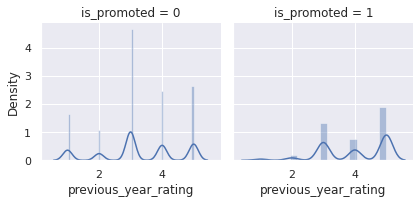

In [64]:
grid = sns.FacetGrid(df, col='is_promoted')
grid.map(sns.distplot,'previous_year_rating')
plt.show()

Dada a maior prevalência de funcionários com rating do ano anterior acima de 2, conclui-se que esta é uma feature interessante em termos de correlação. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


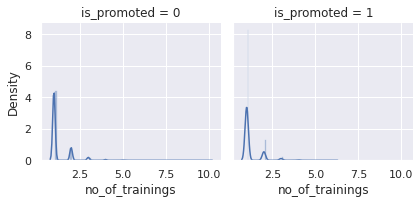

In [65]:
grid = sns.FacetGrid(df, col='is_promoted')
grid.map(sns.distplot,'no_of_trainings')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


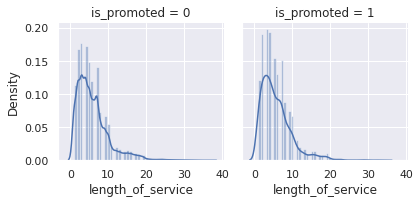

In [66]:
grid = sns.FacetGrid(df, col='is_promoted')
grid.map(sns.distplot,'length_of_service')
plt.show()

Alta semelhança entre as curvas, dificilmente há correlação.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


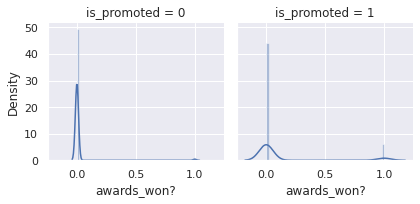

In [69]:
grid = sns.FacetGrid(df, col='is_promoted')
grid.map(sns.distplot,'awards_won?')
plt.show()

Aparentemente, prêmios recebidos colaboram sim para a promoção do funcionário. Portanto, as features numéricas com maior correlação com a promoção são os prêmios ganhos, a avaliação do ano anterior e a pontuação média no treinamento. 

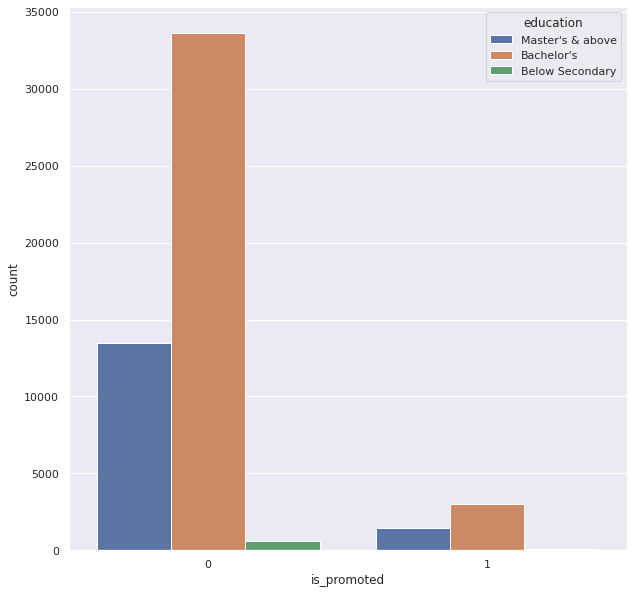

In [78]:
plt.figure(figsize=(10,10))
sns.countplot(x='is_promoted', hue='education', data=df)

Percebe-se a influência do grau de escolaridade na promoção à medida em que casos onde o funcionário é promovido apenas com o secundário são praticamente inexistentes, e a proporção entre mestres e bacharéis tende a se aproximar entre os promovidos, em relação aos demais. 

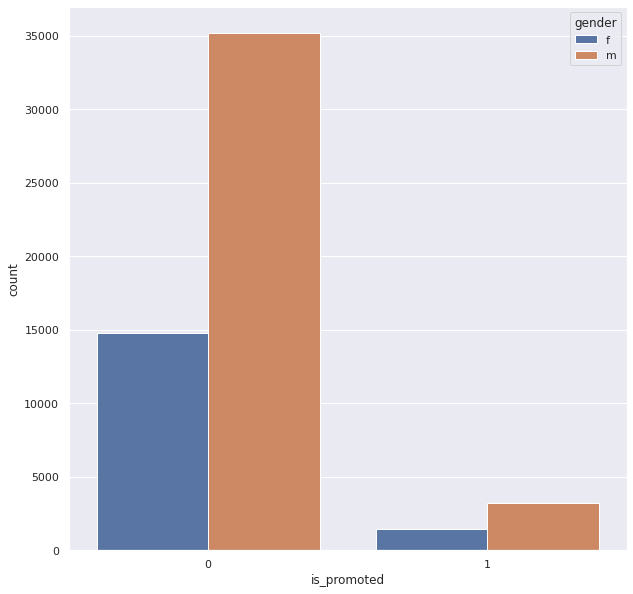

In [79]:
plt.figure(figsize=(10,10))
sns.countplot(x='is_promoted', hue='gender', data=df)

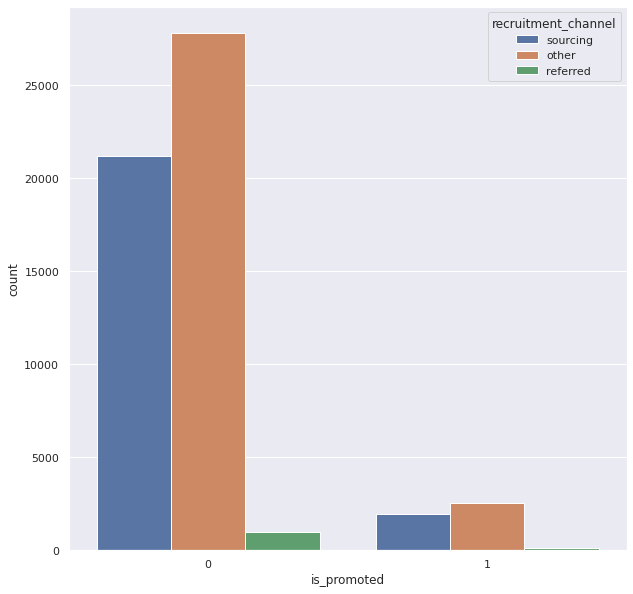

In [80]:
plt.figure(figsize=(10,10))
sns.countplot(x='is_promoted', hue='recruitment_channel', data=df)

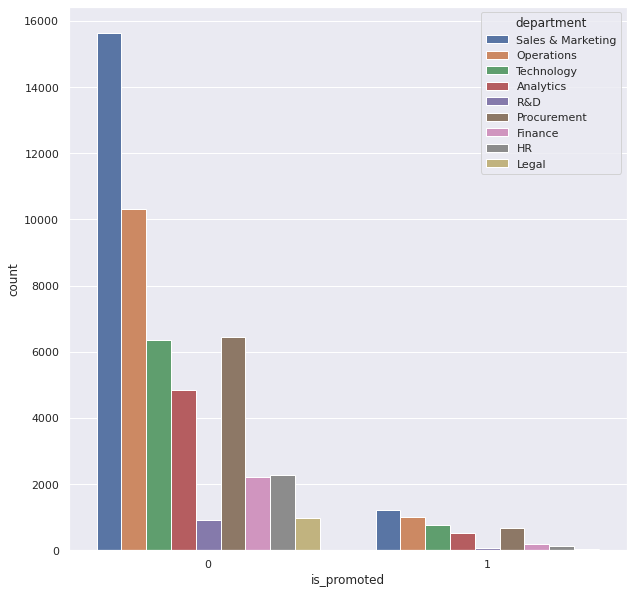

In [82]:
plt.figure(figsize=(10,10))
sns.countplot(x='is_promoted', hue='department', data=df)

Dentre as features categóricas, a educação parece ser a mais relacionada à promoção. 

# Modelo de predição da promoção 

Dada a natureza da target, precisamos de um modelo de classificação. 

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [84]:
X = df.drop(columns='is_promoted')
y = df.is_promoted

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.7)

In [87]:
clr = LogisticRegression(X_train, y_train)

resultado_clr = clr.predict(X_test)

TypeError: ignored